In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from utils import load_jsonl_tuples

In [2]:
artists_df = load_jsonl_tuples('../data/v1/artists.jsonl')
sessions_df = load_jsonl_tuples('../data/v1/sessions.jsonl')
track_storage_df = load_jsonl_tuples('../data/v1/track_storage.jsonl')
tracks_df = load_jsonl_tuples('../data/v1/tracks.jsonl')
users_df = load_jsonl_tuples('../data/v1/users.jsonl')

# Analiza tabel

## Tabela artists

In [3]:
artists_df.head()

,id,name,genres
0,72578usTM6Cj5qWsi471Nc,Raghu Dixit,"(filmi, indian folk, indian rock, kannada pop)"
1,7b6Ui7JVaBDEfZB9k6nHL0,The Local Train,"(desi pop, hindi indie, indian indie, indian r..."
2,5wJ1H6ud777odtZl5gG507,Vishal Mishra,"(desi pop, modern bollywood)"
3,0n4a5imdLBN24fIrBWoqrv,Because,"(opm, pinoy hip hop, pinoy r&b, pinoy trap, ta..."
4,4gdMJYnopf2nEUcanAwstx,Anuv Jain,"(hindi indie, indian indie, indian singer-song..."


In [4]:
artists_df.info()
artists_df[artists_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27650 entries, 0 to 27649
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      27650 non-null  object
 1   name    27650 non-null  object
 2   genres  26245 non-null  object
dtypes: object(3)
memory usage: 648.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      0 non-null      object
 1   name    0 non-null      object
 2   genres  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [5]:
artists_df.isnull().sum()

id           0
name         0
genres    1405
dtype: int64

## Tabela sessions

In [6]:
sessions_df.head()

,timestamp,user_id,track_id,event_type,session_id
0,2024-01-03T13:15:36.207567,101.0,71pw0q9mQD891hI2lJQkbd,play,124
1,2024-01-03T13:20:22.127567,101.0,71pw0q9mQD891hI2lJQkbd,skip,124
2,2024-01-03T13:20:22.127567,101.0,0RT95SGCEZvlRtc12gStyG,play,124
3,2024-01-03T13:24:02.593567,101.0,None,skip,124
4,2024-01-03T13:24:02.593567,101.0,,advertisement,124


In [7]:
sessions_df.info()
sessions_df[sessions_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   3495 non-null   object 
 1   user_id     3324 non-null   float64
 2   track_id    3327 non-null   object 
 3   event_type  3322 non-null   object 
 4   session_id  3495 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 136.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   0 non-null      object 
 1   user_id     0 non-null      float64
 2   track_id    0 non-null      object 
 3   event_type  0 non-null      object 
 4   session_id  0 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 0.0+ bytes


In [8]:
sessions_df.isnull().sum()

timestamp       0
user_id       171
track_id      168
event_type    173
session_id      0
dtype: int64

In [9]:
for event_type in sessions_df['event_type'].unique():
    null_count = sessions_df[(sessions_df['event_type'] == event_type) & (sessions_df['track_id'].isnull())]
    null_count = len(null_count['track_id'])
    print(f'null count for track_id of type {event_type}: {null_count}')

null count for track_id of type play: 98
null count for track_id of type skip: 33
null count for track_id of type advertisement: 2
null count for track_id of type buy_premium: 2
null count for track_id of type like: 27
null count for track_id of type None: 0


event_type
play             2006
skip              686
like              548
buy_premium        46
advertisement      36
Name: count, dtype: int64


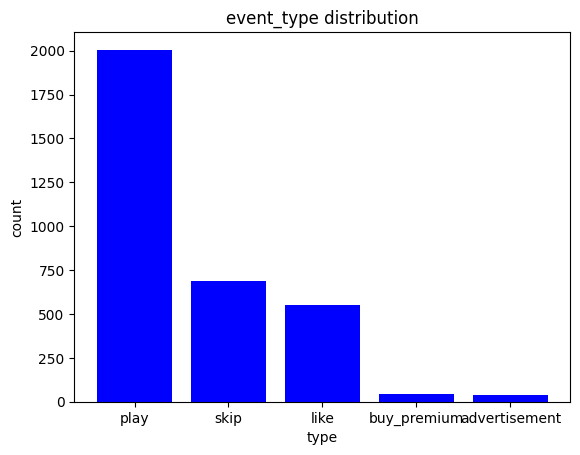

In [10]:
event_type_distribution = sessions_df['event_type'].value_counts()
print(event_type_distribution)

plt.bar(event_type_distribution.index, event_type_distribution.values, color='blue')
plt.title('event_type distribution')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

## Tabela track_storage

In [11]:
track_storage_df.head()

,track_id,storage_class,daily_cost
0,6C0WWu7RYKbAgWUI3YC0sT,slow,0.012479
1,4q7EBRq8ncztC2PRmEC7Fy,slow,0.012737
2,7cNyONpVADZVrW9xe3qq4z,slow,0.013967
3,1bKRTzTFz7wHMxpgZSuPR1,slow,0.009685
4,56OEjuyZ3AROnv4aR1XqhD,slow,0.009106


In [12]:
track_storage_df.info()
track_storage_df[track_storage_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   track_id       129648 non-null  object 
 1   storage_class  129648 non-null  object 
 2   daily_cost     129648 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       0 non-null      object 
 1   storage_class  0 non-null      object 
 2   daily_cost     0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [13]:
track_storage_df.isnull().sum()

track_id         0
storage_class    0
daily_cost       0
dtype: int64

array([[<Axes: title={'center': 'daily_cost'}>]], dtype=object)

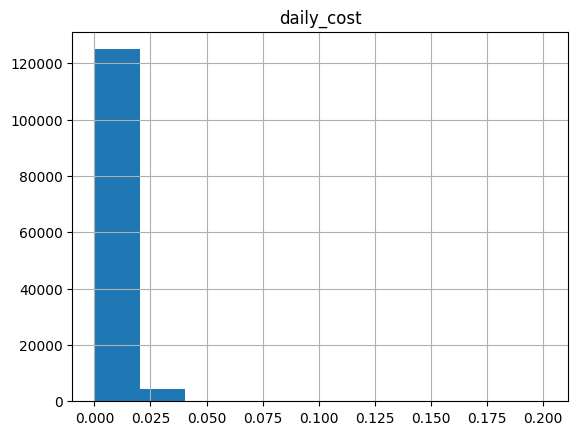

In [14]:
track_storage_df.hist()

storage_class
slow      128433
medium      1208
fast           7
Name: count, dtype: int64


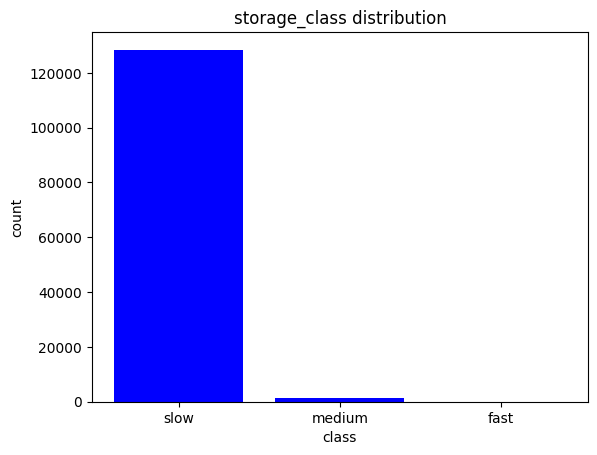

In [15]:
storage_class_distribution = track_storage_df['storage_class'].value_counts()
print(storage_class_distribution)

plt.bar(storage_class_distribution.index, storage_class_distribution.values, color='blue')
plt.title('storage_class distribution')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

## Tabela tracks

In [16]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6C0WWu7RYKbAgWUI3YC0sT,Voglio farti un regalo,40.0,249573,1,7u710e44HW3K7A5eTnRqHC,2004-09-01,0.727,0.6630,4,NaN,-4.818,0.2770,0.08010,0.000000,0.119,0.633,97.865,4
1,4q7EBRq8ncztC2PRmEC7Fy,My Love - Live / Remastered,34.0,254733,0,3sFhA6G1N0gG1pszb6kk1m,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.956,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45.0,279347,0,7IAXZaLTb6nkJr8RmVPn5y,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.128,0.301,159.872,3
3,1bKRTzTFz7wHMxpgZSuPR1,Shine on Harvest Moon,6.0,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.172,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19.0,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,NaN,-24.915,0.0445,0.95800,0.000446,0.241,0.317,100.041,4


In [17]:
tracks_df.info()
tracks_df[tracks_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                123139 non-null  object 
 1   name              123064 non-null  object 
 2   popularity        123189 non-null  float64
 3   duration_ms       129648 non-null  int64  
 4   explicit          129648 non-null  int64  
 5   id_artist         123141 non-null  object 
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  mode              52217 non-null   float64
 11  loudness          129648 non-null  float64
 12  speechiness       129648 non-null  float64
 13  acousticness      129648 non-null  float64
 14  instrumentalness  129648 non-null  float64
 15  liveness          129648 non-null  float64
 16  valence           12

In [18]:
tracks_df.isnull().sum()

id                   6509
name                 6584
popularity           6459
duration_ms             0
explicit                0
id_artist            6507
release_date            0
danceability            0
energy                  0
key                     0
mode                77431
loudness                0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'explicit'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

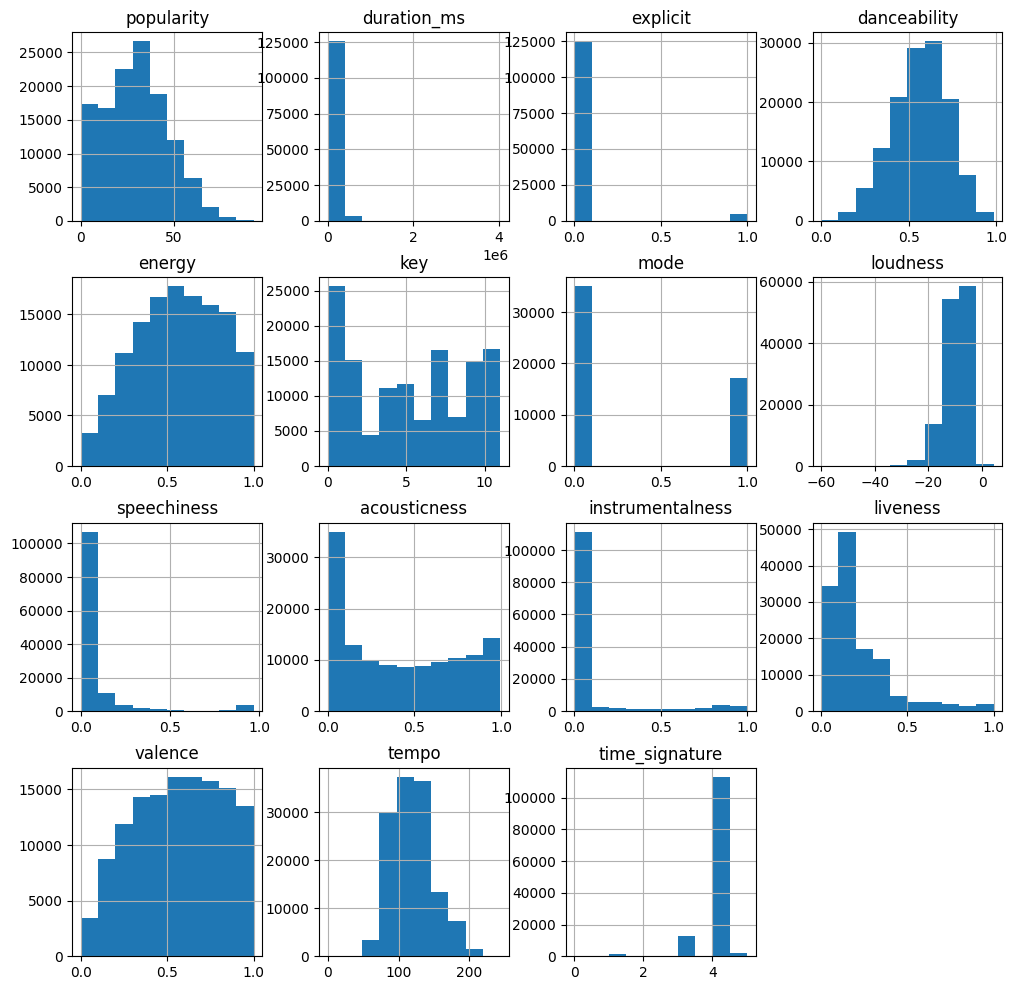

In [19]:
tracks_df.hist(figsize=(12, 12))

## Tabela users

In [20]:
users_df.head()

,user_id,name,city,street,favourite_genres,premium_user,id
0,101,Maurycy Lejk,Wrocław,al. Powstańców Śląskich 04,None,True,NaN
1,102,Julian Rohde,Kraków,al. Rataja 793,"(classic rock, dance pop, argentine rock)",True,NaN
2,103,Jerzy Żelazo,Kraków,pl. Orzechowa 509,"(pop rock, new wave, new romantic)",True,NaN
3,104,Ada Mazanek,Warszawa,pl. Zacisze 78/30,"(new romantic, alternative rock, c-pop)",True,NaN
4,105,Ernest Kukieła,Warszawa,al. Orla 40,"(country rock, metal, mpb)",True,NaN


In [21]:
users_df.info()
users_df[users_df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           50 non-null     int64  
 1   name              50 non-null     object 
 2   city              50 non-null     object 
 3   street            50 non-null     object 
 4   favourite_genres  48 non-null     object 
 5   premium_user      47 non-null     object 
 6   id                1 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           0 non-null      int64  
 1   name              0 non-null      object 
 2   city              0 non-null      object 
 3   street            0 non-null      object 
 4   favourite_genres  0 non-null      objec

In [22]:
users_df.isnull().sum()

user_id              0
name                 0
city                 0
street               0
favourite_genres     2
premium_user         3
id                  49
dtype: int64